# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science

>Jake VanderPlas <br />
>University of Washington eScience Institute

This version of the notebook is an unoganized approach. I'll re-organize the code in another notebook.

In [18]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
address ='../data/fremont.csv'

In [19]:
from urllib.request import urlretrieve # Used to retrieve file from URL

import numpy as np

import pandas as pd
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb
sb.set_style('whitegrid')

In [20]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [22]:
urlretrieve(URL, address) # retrieves data set from 'dropbox' and stores it in your local data folder

data=pd.read_csv(address, index_col='Date', parse_dates=True) # move the data into a data frame

data.head() # preview of the dataset

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<AxesSubplot:xlabel='Date'>

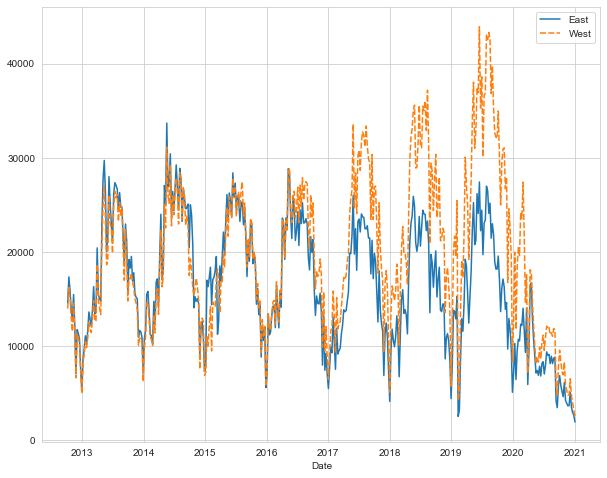

In [12]:
data_subset=data[['Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk']]
data_subset.columns=['East','West']

sb.lineplot(data=data_subset.resample('W').sum())

<AxesSubplot:xlabel='Date'>

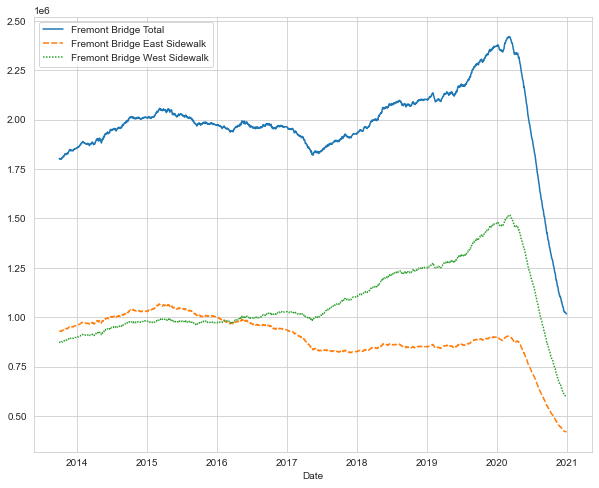

In [13]:
sb.lineplot(data=data.resample('D').sum().rolling(365).sum())

<AxesSubplot:xlabel='time'>

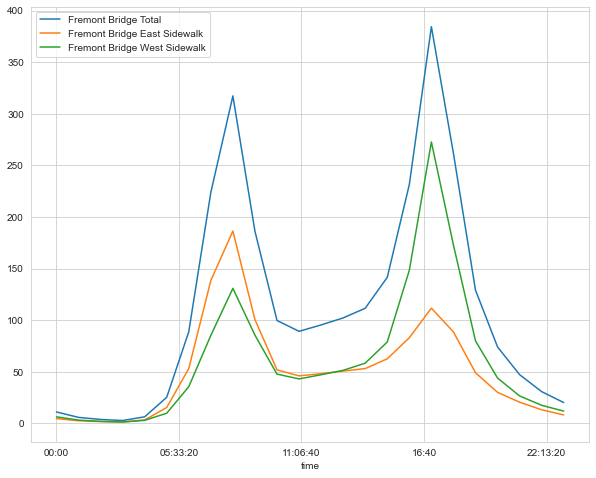

In [14]:
data.groupby(data.index.time).mean().plot()

The graph shows the greatest ammount of commuters are concentrated in the morning and the afternoon. More interestingly we can observe that in the morning we have a higher number of commuters in the East and in the afternoon the highest number of commuters are from the west.

In [15]:
pivoted = pd.pivot_table(data, index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

Fremont Bridge East Sidewalk                                   \
                           2012-10-03 2012-10-04 2012-10-05 2012-10-06   
00:00:00                          4.0        7.0        4.0        8.0   
01:00:00                          4.0        3.0        4.0       10.0   
02:00:00                          1.0        3.0        4.0        7.0   
03:00:00                          2.0        0.0        2.0        1.0   
04:00:00                          6.0        7.0        7.0        4.0   

                     
         2012-10-07  
00:00:00        6.0  
01:00:00       12.0  
02:00:00        2.0  
03:00:00        4.0  
04:00:00        1.0

<AxesSubplot:xlabel='time'>

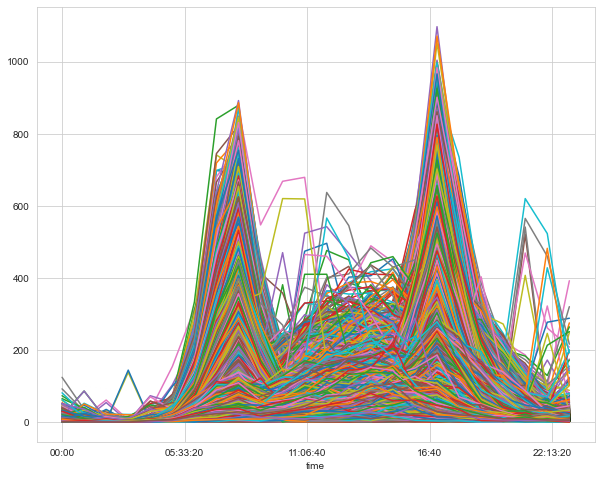

In [16]:
pivoted.plot(legend=False)

The idea was to observe if there is any traffic pattern change **depending on the day of the week**, we will use a grayscale latter to help with this visualization

<AxesSubplot:xlabel='time'>

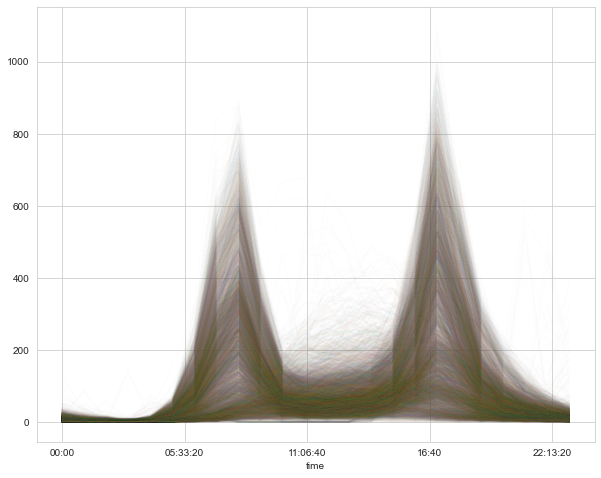

In [17]:
pivoted.plot(legend=False, alpha=0.01)

Now we can observe two main areas that could support the hypothesis that the strong dark patter which show the two peaks are commuters during the week. The other hypothesis is that the light gray pick in the middle could be generated by those commuting during the weekend.